In [346]:
# linear algebra
import numpy as np 
import sklearn

# data processing
import pandas as pd

#feature
import featuretools as ft

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [347]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [348]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Train.csv')

Saving Train.csv to Train (10).csv


In [349]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [350]:
print(df.isnull().count()) #Checking Null Values

Employee_ID                  7000
Gender                       7000
Age                          7000
Education_Level              7000
Relationship_Status          7000
Hometown                     7000
Unit                         7000
Decision_skill_possess       7000
Time_of_service              7000
Time_since_promotion         7000
growth_rate                  7000
Travel_Rate                  7000
Post_Level                   7000
Pay_Scale                    7000
Compensation_and_Benefits    7000
Work_Life_balance            7000
VAR1                         7000
VAR2                         7000
VAR3                         7000
VAR4                         7000
VAR5                         7000
VAR6                         7000
VAR7                         7000
Attrition_rate               7000
dtype: int64


In [351]:
median= df.median()
print(median) #Calculating Median for replacing null values with

Age                     37.00000
Education_Level          3.00000
Time_of_service         10.00000
Time_since_promotion     2.00000
growth_rate             47.00000
Travel_Rate              1.00000
Post_Level               3.00000
Pay_Scale                6.00000
Work_Life_balance        2.00000
VAR1                     3.00000
VAR2                    -0.10480
VAR3                    -0.45370
VAR4                     2.00000
VAR5                     3.00000
VAR6                     7.00000
VAR7                     3.00000
Attrition_rate           0.14265
dtype: float64


In [352]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #how many null values

VAR4                 656
VAR2                 577
Age                  412
Time_of_service      144
Work_Life_balance     11
Pay_Scale              9
dtype: int64

In [353]:
#replacing null values

df['Work_Life_balance'].fillna(df['Work_Life_balance'].median(), inplace = True)
df['VAR4'].fillna(df['VAR4'].median(), inplace = True)
df['VAR2'].fillna(df['VAR2'].median(), inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Time_of_service'].fillna(df['Time_of_service'].median(), inplace = True)
df['Pay_Scale'].fillna(df['Pay_Scale'].median(), inplace = True)

In [354]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [355]:
df.isna().sum() #cross checking number of null values left

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [356]:
#df['Hometown_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Hometown'])
#df['Relationship_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Relationship_Status'])

In [357]:
#from sklearn.preprocessing import OneHotEncoder
#Y_train = np.asarray(df[['Hometown_Code']])

#x=OneHotEncoder(sparse=False).fit_transform(Y_train)
#df["Aa"]=x[:,0]
#df["Bb"]=x[:,1]
#df["Cc"]=x[:,2]

In [358]:
df.drop('Hometown',axis=1,inplace=True) #Hometown dosent affect attrition rate
df.drop('Relationship_Status',axis=1,inplace=True) #can be also determined by Work_Life_Balance

In [359]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [360]:
df.Unit.unique() #Checking numbe of uniuque parameters

array(['IT', 'Logistics', 'Quality', 'Human Resource Management',
       'Purchasing', 'Sales', 'Production', 'Operarions',
       'Accounting and Finance', 'Marketing', 'R&D', 'Security'],
      dtype=object)

In [361]:
df['Unit_Code'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Unit']) #Label Encoding Unit to match scaler form

In [362]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df[['Unit_Code']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df["0"]=x[:,0]
df["1"]=x[:,1]
df["2"]=x[:,2]

In [363]:
df.drop('Unit',axis=1,inplace=True)

In [364]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Unit_Code,0,1,2
0,EID_23371,F,42.0,4,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2,0.0,0.0,1.0
1,EID_18000,M,24.0,3,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,3,0.0,0.0,0.0
2,EID_3891,F,58.0,3,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,8,0.0,0.0,0.0
3,EID_17492,F,26.0,3,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,1,0.0,1.0,0.0
4,EID_22534,F,31.0,1,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,3,0.0,0.0,0.0


In [365]:
df['ID'] = np.arange(len(df))
print (df) #Creating a Serial Number for replacing Employee ID

     Employee_ID Gender   Age  Education_Level  ...    0    1    2    ID
0      EID_23371      F  42.0                4  ...  0.0  0.0  1.0     0
1      EID_18000      M  24.0                3  ...  0.0  0.0  0.0     1
2       EID_3891      F  58.0                3  ...  0.0  0.0  0.0     2
3      EID_17492      F  26.0                3  ...  0.0  1.0  0.0     3
4      EID_22534      F  31.0                1  ...  0.0  0.0  0.0     4
...          ...    ...   ...              ...  ...  ...  ...  ...   ...
6995   EID_16328      F  23.0                5  ...  0.0  0.0  0.0  6995
6996    EID_8387      F  44.0                1  ...  0.0  0.0  0.0  6996
6997    EID_8077      F  49.0                3  ...  0.0  0.0  1.0  6997
6998   EID_19597      F  47.0                3  ...  0.0  0.0  0.0  6998
6999    EID_1640      F  58.0                3  ...  0.0  0.0  1.0  6999

[7000 rows x 26 columns]


In [366]:
df.drop(labels="Employee_ID", axis=1, inplace=True)

In [367]:
df['GenderCoded'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['Gender'])

In [368]:
df.drop('Gender',axis=1,inplace=True)
df.head()

,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Unit_Code,0,1,2,ID,GenderCoded
0,42.0,4,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2,0.0,0.0,1.0,0,0
1,24.0,3,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,3,0.0,0.0,0.0,1,1
2,58.0,3,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,8,0.0,0.0,0.0,2,0
3,26.0,3,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,1,0.0,1.0,0.0,3,0
4,31.0,1,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,3,0.0,0.0,0.0,4,0


In [369]:
df.Compensation_and_Benefits.unique()

array(['type2', 'type3', 'type0', 'type4', 'type1'], dtype=object)

In [370]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df[['Compensation_and_Benefits']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df["Type0"]=x[:,0]
df["Type1"]=x[:,1]
df["Type2"]=x[:,2]
df["Type3"]=x[:,3]
df["Type4"]=x[:,4]

In [371]:
df.drop('Compensation_and_Benefits',axis=1,inplace=True)
df.head()

,Age,Education_Level,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Unit_Code,0,1,2,ID,GenderCoded,Type0,Type1,Type2,Type3,Type4
0,42.0,4,Conceptual,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,0.0
1,24.0,3,Analytical,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,3,0.0,0.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0
2,58.0,3,Conceptual,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,8,0.0,0.0,0.0,2,0,0.0,0.0,1.0,0.0,0.0
3,26.0,3,Behavioral,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,1,0.0,1.0,0.0,3,0,0.0,0.0,1.0,0.0,0.0
4,31.0,1,Conceptual,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,3,0.0,0.0,0.0,4,0,0.0,0.0,0.0,1.0,0.0


In [372]:
df.Decision_skill_possess.unique()

array(['Conceptual', 'Analytical', 'Behavioral', 'Directive'],
      dtype=object)

In [373]:
from sklearn.preprocessing import OneHotEncoder
Y_train = np.asarray(df[['Decision_skill_possess']])

x=OneHotEncoder(sparse=False).fit_transform(Y_train)
df["Analytical"]=x[:,0]
df["Behavioral"]=x[:,1]
df["Conceptual"]=x[:,2]
df["Directive"]=x[:,3]

In [374]:
df.drop('Decision_skill_possess',axis=1,inplace=True)
df.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Unit_Code,0,1,2,ID,GenderCoded,Type0,Type1,Type2,Type3,Type4,Analytical,Behavioral,Conceptual,Directive
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,3,0.0,0.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,8,0.0,0.0,0.0,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,1,0.0,1.0,0.0,3,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,3,0.0,0.0,0.0,4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


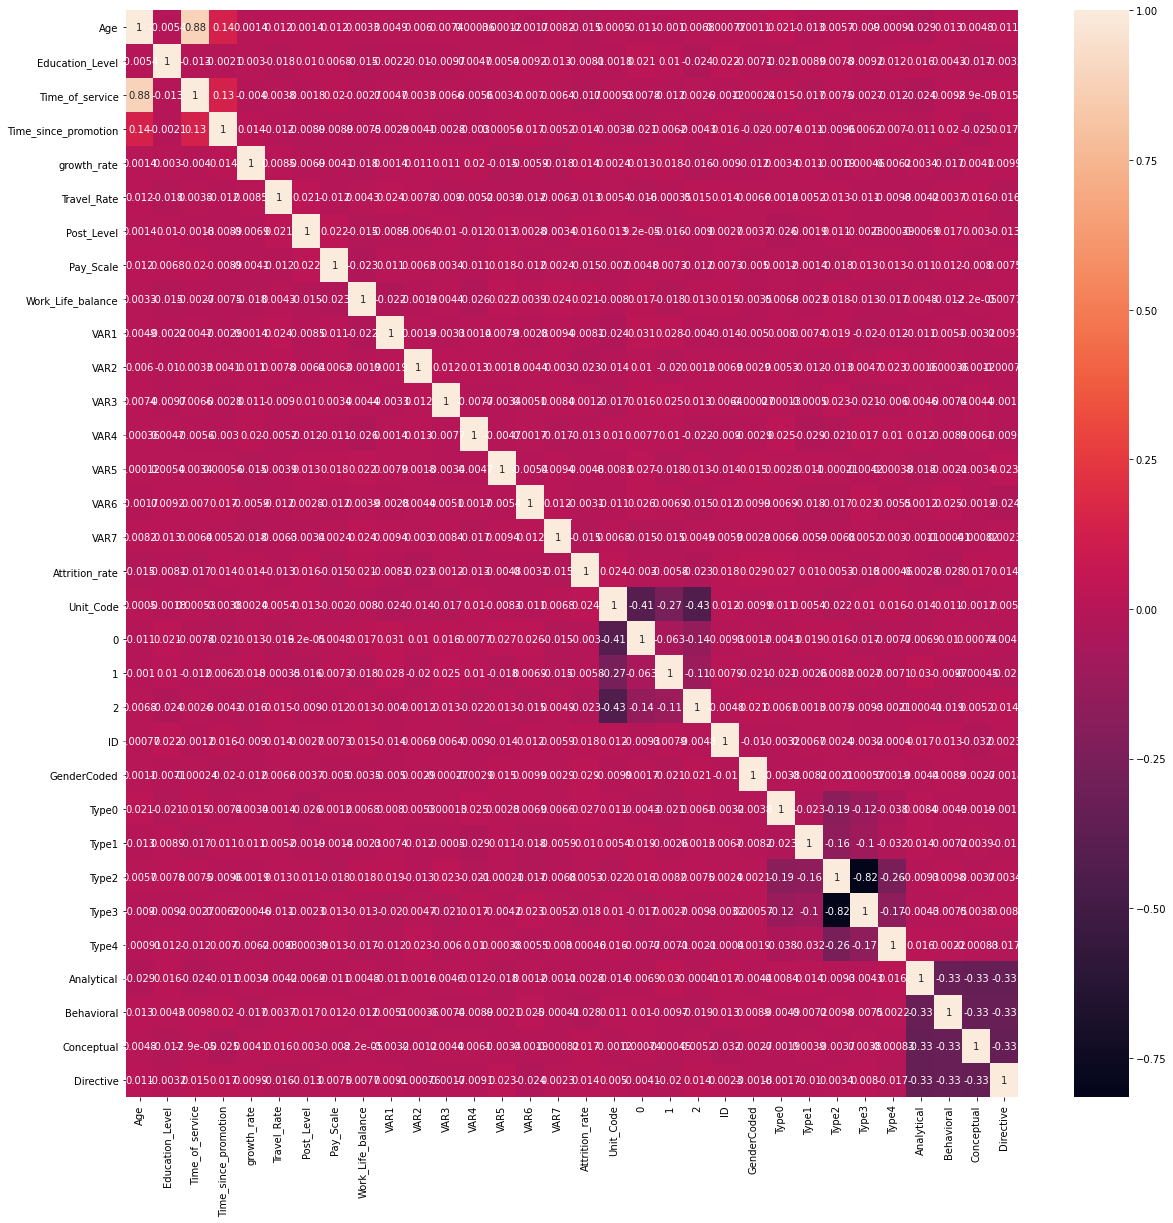

In [375]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:].corr(), annot=True)

In [376]:
Y_train=df["Attrition_rate"] #Setting Y_Train as Attrition Rate

In [377]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df)

In [378]:
print(X_train) #dataset in scaler form

[[0.5        0.75       0.09302326 ... 0.         1.         0.        ]
 [0.10869565 0.5        0.11627907 ... 0.         0.         0.        ]
 [0.84782609 0.5        0.62790698 ... 0.         1.         0.        ]
 ...
 [0.65217391 0.5        0.23255814 ... 0.         0.         1.        ]
 [0.60869565 0.5        0.55813953 ... 1.         0.         0.        ]
 [0.84782609 0.5        0.51162791 ... 0.         0.         1.        ]]


In [379]:
print(Y_train)

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64


In [380]:
from sklearn.model_selection import train_test_split

state = 12  
test_size = 0.30  
  
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,  
    test_size=test_size, random_state=state)

In [381]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val,Y_val)))

Learning rate:  0.05
Accuracy score (training): 0.220
Accuracy score (validation): 0.223
Learning rate:  0.075
Accuracy score (training): 0.307
Accuracy score (validation): 0.311
Learning rate:  0.1
Accuracy score (training): 0.382
Accuracy score (validation): 0.386
Learning rate:  0.25
Accuracy score (training): 0.672
Accuracy score (validation): 0.676
Learning rate:  0.5
Accuracy score (training): 0.824
Accuracy score (validation): 0.825
Learning rate:  0.75
Accuracy score (training): 0.905
Accuracy score (validation): 0.897
Learning rate:  1
Accuracy score (training): 0.867
Accuracy score (validation): 0.858


In [382]:
gb_r2 = GradientBoostingRegressor(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_r2.fit(X_train, Y_train)
accuracy=gb_r2.score(X_train,Y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=gb_r2.score(X_val,Y_val)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.47 %.
Accuracy: 89.74 %.


In [383]:
from xgboost import XGBRegressor

xgb_rg = XGBRegressor()
xgb_rg.fit(X_train, Y_train)

[14:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [384]:
score = xgb_rg.score(X_val, Y_val)
print(score)

0.9999300137037648
